In [71]:
### REFER TO THE WRITE-UP TO UNDERSTAND THE LOGIC BEHIND EACH CELL
### INSTALL PACKAGES IF NECESSARY

## LIBRARY TO DOWNLOAD COMMENTS ON YOUTUBE VIDEOS - https://github.com/egbertbouman/youtube-comment-downloader
# pip install youtube-comment-downloader

## LIBRARIES TO CONDUCT SENTIMENT ANALYSIS
# pip install nltk

In [1]:
### SET UP

import pandas as pd # data wrangling
import numpy as np # linear algebra
import matplotlib.pyplot as plt # basic data visualization
import seaborn as sns # advanced data visualization
from youtube_comment_downloader import * # download comments on YouTube videos
import string # remove punctuation
from nltk.corpus import stopwords # text preprocessing
from nltk.tokenize import word_tokenize # text preprocessing
from nltk.tokenize import TweetTokenizer # text preprocessing
import nltk # sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer # sentiment analysis
from tmdbv3api import TMDb, Movie # the movie database scores
import requests # open movie database scores
from scipy.stats import pearsonr, spearmanr # correlation calculations
from tabulate import tabulate # add correlation results to table

nltk.download('vader_lexicon') # sentiment analysis
nltk.download('stopwords') # download stopwords

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macuriels/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macuriels/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
# Create function to download and preprocess YouTube comments
def process_video_comments(video_url):
    # Initialize Youtube Comment Downloader
    downloader = YoutubeCommentDownloader()

    # Download comments in a JSON file
    comments = downloader.get_comments_from_url(video_url, sort_by=SORT_BY_POPULAR)

    # JSON to dataframe
    df = pd.DataFrame(comments)
    
    # Add a new column for the video URL identifier
    df['video_url'] = video_url

    # Select only comments, not replies
    df = df[df['reply'].isin([False])]

    # Reset index
    df = df.reset_index(drop=True)

    # Function to convert values with 'K' to numeric values
    def convert_to_numeric(value):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        else:
            return float(value)

    # Apply the conversion function to the 'votes' column
    df['votes'] = df['votes'].apply(convert_to_numeric)

    # Sort the DataFrame by the "votes" column in descending order
    df = df.sort_values(by="votes", ascending=False)

    # Reset the index to maintain a consistent index for the sorted DataFrame
    df = df.reset_index(drop=True)

    # Select the top 50 rows of the DataFrame
    df = df.head(50)

    # Initialize the VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis to the 'text' column and store the results in a new column 'sentiment_scores'
    df['sentiment_vader_all'] = df['text'].apply(lambda x: sid.polarity_scores(x))

    # Extract the compound sentiment score from the 'sentiment_scores' dictionary
    df['sentiment_vader'] = df['sentiment_vader_all'].apply(lambda x: x['compound'])

    # Filter the DataFrame to keep only rows where "sentiment" is above 0.30 or below -0.30
    df = df[(df['sentiment_vader'] > 0.30)]

    # Reset the index to maintain a clean and continuous index for the filtered DataFrame
    df = df.reset_index(drop=True)

    return df

In [ ]:
### ALL MOVIE INFORMATION FOR THE RECORD

# movie_name_1 = 'Spider Man No Way Home'
# imdb_id_1 = 'tt10872600'
# video_url_1 = 'https://www.youtube.com/watch?v=4gyYWO5EYqs'

# movie_name_2 = 'Thor Ragnarok'
# imdb_id_2 = 'tt3501632'
# video_url_2 = 'https://www.youtube.com/watch?v=tIRL6xk2hNk'

# movie_name_3 = 'Morbius'
# imdb_id_3 = 'tt5108870'
# video_url_3 = 'https://www.youtube.com/watch?v=dIZirbxxn28'

# movie_name_4 = 'Fantastic Four 2015'
# imdb_id_4 = 'tt1502712'
# video_url_4 = 'https://www.youtube.com/watch?v=VVtIY1vFAP8'

# movie_name_5 = 'Guardians of the Galaxy'
# imdb_id_5 = 'tt2015381'
# video_url_5 = 'https://www.youtube.com/watch?v=bGh93H-hvl0'

# movie_name_6 = 'Spider Man 2 2004'
# imdb_id_6 = 'tt0316654'
# video_url_6 = 'https://www.youtube.com/watch?v=H2oz8ETEg4E'

# movie_name_7 = 'Dark Phoenix'
# imdb_id_7 = 'tt6565702'
# video_url_7 = 'https://www.youtube.com/watch?v=ilY6lU5jZeY'

# movie_name_8 = 'Suicide Squad'
# imdb_id_8 = 'tt1386697'
# video_url_8 = 'https://www.youtube.com/watch?v=FKaLy54AbWs'

# movie_name_9 = 'Logan'
# imdb_id_9 = 'tt3315342'
# video_url_9 = 'https://www.youtube.com/watch?v=q-0ony3CrXg'

# movie_name_10 = 'Batman v Superman'
# imdb_id_10 = 'tt2975590'
# video_url_10 = 'https://www.youtube.com/watch?v=aC4rt7K8fPY'

In [74]:
# Set movie information
movie_name_1 = 'Spider Man No Way Home'
imdb_id_1 = 'tt10872600'
video_url_1 = 'https://www.youtube.com/watch?v=4gyYWO5EYqs'

# Run function on YouTube URL
df_1 = process_video_comments(video_url_1)

# Create a conditional mask for the specific video URL
mask_1 = df_1['video_url'] == video_url_1

# Use the conditional mask to set values for the new columns
df_1.loc[mask_1, 'imdb_id'] = imdb_id_1
df_1.loc[mask_1, 'movie_name'] = movie_name_1

df_1

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed,video_url,sentiment_vader_all,sentiment_vader,imdb_id,movie_name
0,Ugxy0EW0hAXkMITlCul4AaABAg,I liked how Tobey encouraged Andrew when he wa...,1 year ago (edited),@JCW7100,UCbvXnBx64gxlA1H4vDJzpbQ,16000.0,https://yt3.ggpht.com/ytc/APkrFKbrEzLfMW1O4gkA...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.056, 'neu': 0.693, 'pos': 0.251, 'co...",0.8069,tt10872600,Spider Man No Way Home
1,UgwHvRvLbOPqvaekxD54AaABAg,I just hope that Andrew Garfield knows that ev...,1 year ago,@Memehuskie,UCh82u85qKmdJgi18eC6F1aw,7900.0,https://yt3.ggpht.com/R645Cum_zO5MssGz8sFrNSjA...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7650,tt10872600,Spider Man No Way Home
2,UgwtMgwyAET_fnp0RBJ4AaABAg,Willem Dafoe's face getting a bigger smile eve...,1 year ago,@Arcademan09,UC5-NgJBkshUiNP-LitAVKPQ,6900.0,https://yt3.ggpht.com/ytc/APkrFKbqUAKgyQu5TRzD...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.7430,tt10872600,Spider Man No Way Home
3,UgyMdnQwIk2DakHYD8V4AaABAg,They made what didn't work in The Amazing Spid...,1 year ago,@hunterkiller1440,UC30IjiHQ4YOKSjA-aI5lhhQ,5500.0,https://yt3.ggpht.com/ytc/APkrFKYWHR6YG51PTIy2...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",0.8767,tt10872600,Spider Man No Way Home
4,UgwLlPNVbPZYiim55Ut4AaABAg,Andrew Garfield really shined in this movie. T...,1 year ago,@amitnagpal1985,UC8_aUc9vnTE_uehi8IbYMjQ,4600.0,https://yt3.ggpht.com/ytc/APkrFKZjmZSSaX3mwGnc...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.9246,tt10872600,Spider Man No Way Home
5,UgyoOV3-6m70gUY7HxJ4AaABAg,Andrew Garfield and Willem Dafoe for me defini...,1 year ago,@c40ra19,UCTZco_tu1b6HTq2UzMlzgZg,3400.0,https://yt3.ggpht.com/ytc/APkrFKY_RqIGHmHVgJjo...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compou...",0.7650,tt10872600,Spider Man No Way Home
6,UgzwcKKw6J0GqDzodpR4AaABAg,When Andrew says “I love you guys” and “I’ve a...,1 year ago,@dariustang9670,UCwXdqLDhFUdbLYt8B5yb56Q,3400.0,https://yt3.ggpht.com/ytc/APkrFKZ2njM6PyyTGETY...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.073, 'neu': 0.765, 'pos': 0.162, 'co...",0.8363,tt10872600,Spider Man No Way Home
7,UgzHDTdMei3Bfx3EzKx4AaABAg,The inclusion of Tobey and Andrew served the s...,1 year ago,@AmanStudios,UCPCtAOdYZW95kQUiLm7QBgg,2700.0,https://yt3.ggpht.com/1j0_v3TbgkU5WENy--0W2LhD...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.034, 'neu': 0.824, 'pos': 0.142, 'co...",0.7269,tt10872600,Spider Man No Way Home
8,UgwaNxXavN-gpUj8JCJ4AaABAg,Andrew Garfield honestly was the star of the s...,1 year ago,@821Drifter128,UCWJRGcYqZWAkfsdtx5k8r_Q,2400.0,https://yt3.ggpht.com/ytc/APkrFKaGEbQ-iBp75Bz7...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.093, 'neu': 0.739, 'pos': 0.168, 'co...",0.4104,tt10872600,Spider Man No Way Home
9,UgxwN5aCKSdrcxX2C094AaABAg,"When Norman says ""you know I'm something of a ...",1 year ago,@extraplain2412,UC7SVrNwD40ncVa_OpwXwnRg,2400.0,https://yt3.ggpht.com/jFZOTL29KwqSWg-2LU3JzdRH...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.8126,tt10872600,Spider Man No Way Home


In [84]:
### THE REST OF THE YOUTUBE COMMENTS WERE DOWNLOADED SEPARATELY FOR TWO REASONS:
##### 1) DOWNLOADING YOUTUBE COMMENTS TAKES TIME
##### 2) TO FREE UP SPACE IN THE NOTEBOOK
### BELOW IS A SNIPPET OF THE RESULTING DATAFRAME WITH THE COMMENTS FOR ALL REVIEWS
### NOTICE HOW THE LAST COLUMN CONTAINS THE DIFFERENT MOVIE NAMES

# Concatenate (stack) the dataframes vertically
df_comments = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10], axis=0, ignore_index=True)

df_comments

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed,video_url,sentiment_vader_all,sentiment_vader,imdb_id,movie_name
0,Ugxy0EW0hAXkMITlCul4AaABAg,I liked how Tobey encouraged Andrew when he wa...,1 year ago (edited),@JCW7100,UCbvXnBx64gxlA1H4vDJzpbQ,16000.0,https://yt3.ggpht.com/ytc/APkrFKbrEzLfMW1O4gkA...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.056, 'neu': 0.693, 'pos': 0.251, 'co...",0.8069,tt10872600,Spider Man No Way Home
1,UgwHvRvLbOPqvaekxD54AaABAg,I just hope that Andrew Garfield knows that ev...,1 year ago,@Memehuskie,UCh82u85qKmdJgi18eC6F1aw,7900.0,https://yt3.ggpht.com/R645Cum_zO5MssGz8sFrNSjA...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7650,tt10872600,Spider Man No Way Home
2,UgwtMgwyAET_fnp0RBJ4AaABAg,Willem Dafoe's face getting a bigger smile eve...,1 year ago,@Arcademan09,UC5-NgJBkshUiNP-LitAVKPQ,6900.0,https://yt3.ggpht.com/ytc/APkrFKbqUAKgyQu5TRzD...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.7430,tt10872600,Spider Man No Way Home
3,UgyMdnQwIk2DakHYD8V4AaABAg,They made what didn't work in The Amazing Spid...,1 year ago,@hunterkiller1440,UC30IjiHQ4YOKSjA-aI5lhhQ,5500.0,https://yt3.ggpht.com/ytc/APkrFKYWHR6YG51PTIy2...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",0.8767,tt10872600,Spider Man No Way Home
4,UgwLlPNVbPZYiim55Ut4AaABAg,Andrew Garfield really shined in this movie. T...,1 year ago,@amitnagpal1985,UC8_aUc9vnTE_uehi8IbYMjQ,4600.0,https://yt3.ggpht.com/ytc/APkrFKZjmZSSaX3mwGnc...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.9246,tt10872600,Spider Man No Way Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,UggNeBuLtLrSiHgCoAEC,Marvel just won this fight with Daredevil,7 years ago,@29kangka,UCJIhTFewiYLWaZgtgpIzXOw,195.0,https://yt3.ggpht.com/ytc/APkrFKbP-jZIYqxkfB0o...,False,False,1.478447e+09,https://www.youtube.com/watch?v=aC4rt7K8fPY,"{'neg': 0.214, 'neu': 0.214, 'pos': 0.571, 'co...",0.6124,tt2975590,Batman v Superman
254,Ugh1AiUXUQFVd3gCoAEC,I trust you on this. Will go see it drunk. Bet...,7 years ago,@baronsengir187,UCToYzT7u7oHNESRDOfVNiqQ,172.0,https://yt3.ggpht.com/ytc/APkrFKbecf4z9arSymv3...,False,False,1.478447e+09,https://www.youtube.com/watch?v=aC4rt7K8fPY,"{'neg': 0.136, 'neu': 0.511, 'pos': 0.352, 'co...",0.5859,tt2975590,Batman v Superman
255,UgjebgAnb9EDwngCoAEC,"Good fucking job, WB and Zack Snyder. You have...",7 years ago,@brandonmumek1282,UCtyHvTPP_9049gkHRRgDKmw,168.0,https://yt3.ggpht.com/ytc/APkrFKaoexjTEW-uJQ8-...,False,False,1.478447e+09,https://www.youtube.com/watch?v=aC4rt7K8fPY,"{'neg': 0.073, 'neu': 0.66, 'pos': 0.267, 'com...",0.7096,tt2975590,Batman v Superman
256,Ugg-qlYwMoU6JngCoAEC,tbh I liked this more than age of ultron,7 years ago,@Hoodie47,UCiFMVnPlZDfTXScq326QO8w,163.0,https://yt3.ggpht.com/DkRuA-uEC14ItP_ID4c1Pvcg...,False,False,1.478447e+09,https://www.youtube.com/watch?v=aC4rt7K8fPY,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215,tt2975590,Batman v Superman


In [85]:
# Create a local copy to avoid running the YouTube comment downloader everytime

# df_comments.to_csv('youtube_comments.csv')

In [7]:
# Unhash below if you are working on local file
df_comments = pd.read_csv('youtube_comments.csv')

# Group by 'id' and calculate the average 'sentiment_score'
df_sentiment = df_comments.groupby(['imdb_id', 'movie_name'])['sentiment_vader'].mean().reset_index()

# Create a local copy to avoid running the YouTube comment downloader everytime
# df_sentiment.to_csv('youtube_sentiments.csv')

df_sentiment

,imdb_id,movie_name,sentiment_vader
0,tt0316654,Spider Man 2 2004,0.773097
1,tt10872600,Spider Man No Way Home,0.704438
2,tt1386697,Suicide Squad,0.638520
3,tt1502712,Fantastic Four 2015,0.589008
4,tt2015381,Guardians of the Galaxy,0.784280
5,tt2975590,Batman v Superman,0.608745
6,tt3315342,Logan,0.646065
7,tt3501632,Thor Ragnarok,0.658208
8,tt5108870,Morbius,0.661288
9,tt6565702,Dark Phoenix,0.566129


In [8]:
# Unhash below if you are working on local file
# df_sentiment = pd.read_csv('youtube_sentiments.csv')

# df_sentiment

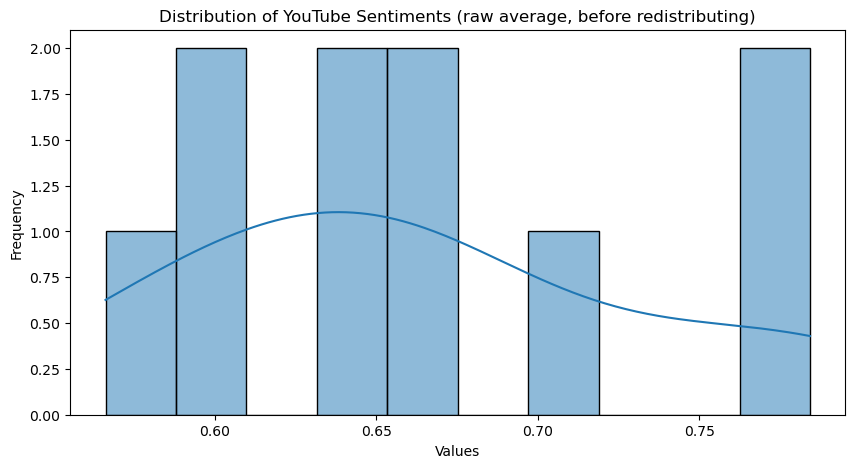

In [9]:
# Create a histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sentiment, x='sentiment_vader', bins=10, kde=True)
plt.title('Distribution of YouTube Sentiments (raw average, before redistributing)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Rename column
df_sentiment.rename(columns={'sentiment_vader': 'sentiment_vader_original'}, inplace = True)

# Multiply column to be a 0-100 scale 
df_sentiment['sentiment_vader_original'] = df_sentiment['sentiment_vader_original'] * 100

# Custom scaling function
def custom_scale(value):
    if value < 61:
        return value - 35
    elif 61 <= value < 64:
        return value - 20
    elif 64 <= value <= 68:
        return value  # No change in this range
    else:  # value > 68
        return value + 15

# Apply the custom scaling to the 'sentiment_vader_original' column
df_sentiment['sentiment_vader'] = df_sentiment['sentiment_vader_original'].apply(custom_scale)

# Create a local copy to avoid running everytime
# df_sentiment_redistributed = df_sentiment.copy()
# df_sentiment_redistributed.to_csv('youtube_sentiments_redistributed.csv')

df_sentiment

,imdb_id,movie_name,sentiment_vader_original,sentiment_vader
0,tt0316654,Spider Man 2 2004,77.309750,92.309750
1,tt10872600,Spider Man No Way Home,70.443784,85.443784
2,tt1386697,Suicide Squad,63.852000,43.852000
3,tt1502712,Fantastic Four 2015,58.900800,23.900800
4,tt2015381,Guardians of the Galaxy,78.428000,93.428000
5,tt2975590,Batman v Superman,60.874500,25.874500
6,tt3315342,Logan,64.606500,64.606500
7,tt3501632,Thor Ragnarok,65.820833,65.820833
8,tt5108870,Morbius,66.128788,66.128788
9,tt6565702,Dark Phoenix,56.612857,21.612857


In [11]:
# Initialize TMDb with your API key
tmdb = TMDb()
tmdb.api_key = 'INSERT-KEY-HERE' # API KEY REMOVED FOR PRIVACY REASONS

# You can set up your API key following TMDb's instructions online

# Create a Movie instance
movie = Movie()

# List of dictionaries with IMDb IDs and movie names
movie_data = [
    {"imdb_id": "tt10872600", "movie_name": "Spider Man No Way Home"},
    {"imdb_id": "tt3501632", "movie_name": "Thor Ragnarok"},
    {"imdb_id": "tt5108870", "movie_name": "Morbius"},
    {"imdb_id": "tt1502712", "movie_name": "Fantastic Four 2015"},
    {"imdb_id": "tt2015381", "movie_name": "Guardians of the Galaxy"},
    {"imdb_id": "tt0316654", "movie_name": "Spider Man 2 2004"},
    {"imdb_id": "tt6565702", "movie_name": "Dark Phoenix"},
    {"imdb_id": "tt1386697", "movie_name": "Suicide Squad"},
    {"imdb_id": "tt3315342", "movie_name": "Logan"},
    {"imdb_id": "tt2975590", "movie_name": "Batman v Superman"},
]

# Initialize an empty list to store movie data
movie_data_tmdb = []

# Loop through each dictionary and retrieve movie details, including ratings
for movie_info in movie_data:
    imdb_id = movie_info["imdb_id"]
    movie_name = movie_info["movie_name"]

    # Search for the movie using the name
    search_results = movie.search(movie_name)

    # Check if any results were found
    if search_results:
        # Extract the movie ID from the search results
        movie_id = search_results[0]['id']

        # Get movie details, including ratings
        movie_details = movie.details(movie_id)

        # Access the ratings
        ratings = movie_details.get('vote_average', 'N/A')

        # Append movie data to the list
        movie_data_tmdb.append({'imdb_id': imdb_id, 'movie_name': movie_name, 'TMDb Rating': ratings})
    else:
        print(f'Movie not found: {movie_name}')

# Create a DataFrame from the movie data
df_tmdb = pd.DataFrame(movie_data_tmdb)

df_tmdb

,imdb_id,movie_name,TMDb Rating
0,tt10872600,Spider Man No Way Home,7.972
1,tt3501632,Thor Ragnarok,7.600
2,tt5108870,Morbius,6.056
3,tt1502712,Fantastic Four 2015,4.400
4,tt2015381,Guardians of the Galaxy,7.976
5,tt0316654,Spider Man 2 2004,7.269
6,tt6565702,Dark Phoenix,5.981
7,tt1386697,Suicide Squad,5.911
8,tt3315342,Logan,7.819
9,tt2975590,Batman v Superman,5.965


In [12]:
# List of dictionaries with IMDb IDs and movie names
movie_data = [
    {"imdb_id": "tt10872600", "movie_name": "Spider Man No Way Home"},
    {"imdb_id": "tt3501632", "movie_name": "Thor Ragnarok"},
    {"imdb_id": "tt5108870", "movie_name": "Morbius"},
    {"imdb_id": "tt1502712", "movie_name": "Fantastic Four 2015"},
    {"imdb_id": "tt2015381", "movie_name": "Guardians of the Galaxy"},
    {"imdb_id": "tt0316654", "movie_name": "Spider Man 2 2004"},
    {"imdb_id": "tt6565702", "movie_name": "Dark Phoenix"},
    {"imdb_id": "tt1386697", "movie_name": "Suicide Squad"},
    {"imdb_id": "tt3315342", "movie_name": "Logan"},
    {"imdb_id": "tt2975590", "movie_name": "Batman v Superman"},
]

# Initialize an empty list to store movie data
all_movie_data = []

# Define the list of scores to retrieve from the API
scores_to_retrieve = ["Rotten Tomatoes", "imdbRating", "Metascore"]

# Loop through each movie data and retrieve movie details, including scores
for movie_info in movie_data:
    imdb_id = movie_info["imdb_id"]
    movie_name = movie_info["movie_name"]

    # Make a request to the OMDB API with the IMDb ID
    url = f"http://www.omdbapi.com/?i={imdb_id}&apikey=INSERT-KEY-HERE" # API KEY REMOVED FOR PRIVACY REASONS
    # You can set up your API key following OMDb and IMDb's instructions online
    response = requests.get(url)

    if response.status_code == 200:
        movie_info = response.json()

        # Initialize a dictionary to store scores for the current movie
        movie_scores = {"imdb_id": imdb_id, "movie_name": movie_name}

        # Retrieve the specified scores and add them to the dictionary
        for score_name in scores_to_retrieve:
            if score_name == "Rotten Tomatoes":
                # Search for the Rotten Tomatoes score in the "Ratings" list
                ratings = movie_info.get("Ratings", [])
                rt_rating = next((rating["Value"] for rating in ratings if "Rotten Tomatoes" in rating["Source"]), "N/A")

                # Remove the percentage sign and rescale to a 0-10 scale
                rt_rating = float(rt_rating.replace('%', '')) / 10.0
                movie_scores[score_name] = rt_rating
            else:
                # Retrieve other scores directly from the movie_info dictionary
                score_value = movie_info.get(score_name, "N/A")
                if score_name == "imdbRating":
                    # Convert the imdbRating to a float
                    score_value = float(score_value)
                movie_scores[score_name] = score_value

        all_movie_data.append(movie_scores)
    else:
        print(f"Movie not found for IMDb ID: {imdb_id}")

# Create a DataFrame from the movie data
df_omdb = pd.DataFrame(all_movie_data)

df_omdb

,imdb_id,movie_name,Rotten Tomatoes,imdbRating,Metascore
0,tt10872600,Spider Man No Way Home,9.3,8.2,71
1,tt3501632,Thor Ragnarok,9.3,7.9,74
2,tt5108870,Morbius,1.5,5.2,35
3,tt1502712,Fantastic Four 2015,0.9,4.3,27
4,tt2015381,Guardians of the Galaxy,9.2,8.0,76
5,tt0316654,Spider Man 2 2004,9.3,7.5,83
6,tt6565702,Dark Phoenix,2.2,5.7,43
7,tt1386697,Suicide Squad,2.6,5.9,40
8,tt3315342,Logan,9.3,8.1,77
9,tt2975590,Batman v Superman,2.9,6.5,44


In [14]:
# First, join df1 and df2 using 'id' as the common key
df_merged_interim = df_sentiment.merge(df_tmdb, on='imdb_id', how='inner')

# Then, join the resulting merged_df with df3
df_merged = df_merged_interim.merge(df_omdb, on='imdb_id', how='inner')

# Drop duplicate columns
df_merged.drop(columns=['movie_name_x', 'movie_name_y'], axis=1, inplace=True)

# Create a new DataFrame with the desired column order
df_merged = df_merged[[
    'movie_name'
    , 'imdb_id'
    , 'TMDb Rating'
    , 'Metascore'
    , 'Rotten Tomatoes'
    , 'imdbRating'
    , 'sentiment_vader'
]]

# Convert column to numerical type
df_merged['Metascore'] = df_merged['Metascore'].astype('float')

# Rename column
df_merged.rename(columns={'sentiment_vader': 'YouTube Sentiment'}, inplace = True)

# Create a local copy to avoid running everytime
# df_merged.to_csv('youtube_vs_others.csv')

df_merged

,movie_name,imdb_id,TMDb Rating,Metascore,Rotten Tomatoes,imdbRating,YouTube Sentiment
0,Spider Man 2 2004,tt0316654,7.269,83.0,9.3,7.5,92.309750
1,Spider Man No Way Home,tt10872600,7.972,71.0,9.3,8.2,85.443784
2,Suicide Squad,tt1386697,5.911,40.0,2.6,5.9,43.852000
3,Fantastic Four 2015,tt1502712,4.400,27.0,0.9,4.3,23.900800
4,Guardians of the Galaxy,tt2015381,7.976,76.0,9.2,8.0,93.428000
5,Batman v Superman,tt2975590,5.965,44.0,2.9,6.5,25.874500
6,Logan,tt3315342,7.819,77.0,9.3,8.1,64.606500
7,Thor Ragnarok,tt3501632,7.600,74.0,9.3,7.9,65.820833
8,Morbius,tt5108870,6.056,35.0,1.5,5.2,66.128788
9,Dark Phoenix,tt6565702,5.981,43.0,2.2,5.7,21.612857


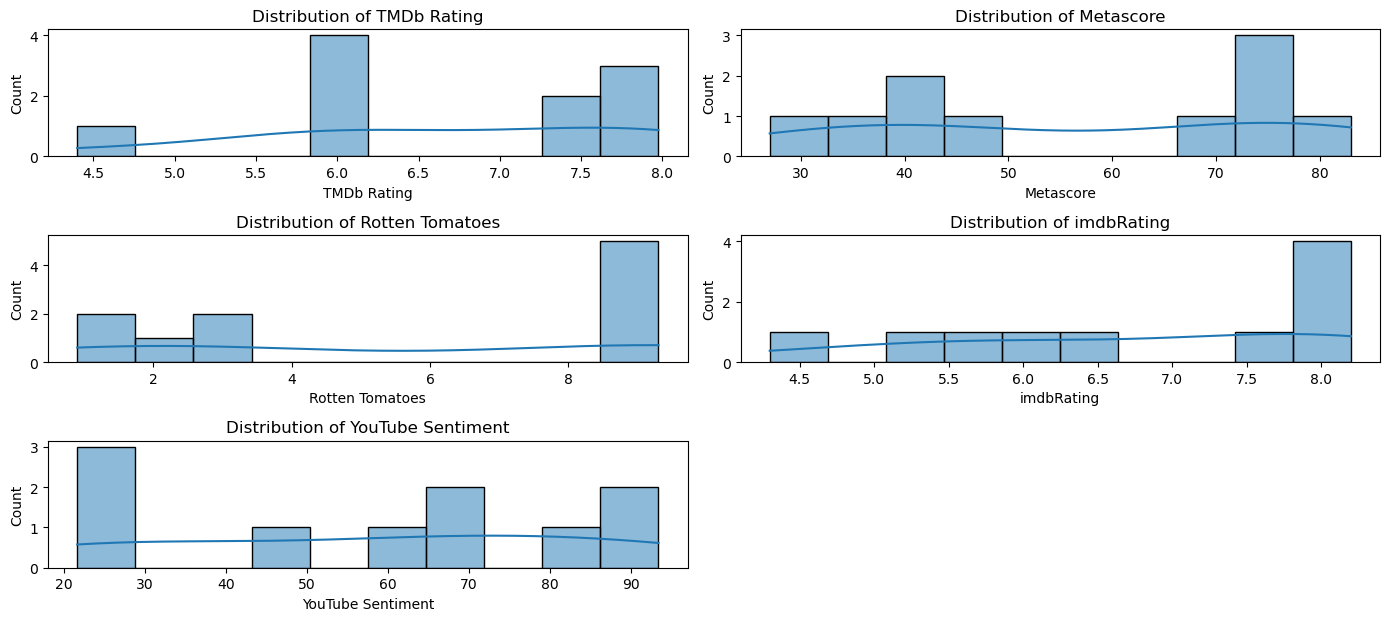

In [15]:
# Define the columns you want to plot
columns_to_plot = df_merged[[
    'TMDb Rating'
    , 'Metascore'
    , 'Rotten Tomatoes'
    , 'imdbRating'
    , 'YouTube Sentiment']]

# Set the number of columns in the grid
num_cols = 2  # You can adjust this to your preference
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a grid of distribution plots
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_merged[column], kde=True, bins=10)  # You can choose different plot types (e.g., kde=False for histograms)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [16]:
# Calculating correlation matrix
correlation_matrix = df_merged.corr(method='spearman')

correlation_matrix

,TMDb Rating,Metascore,Rotten Tomatoes,imdbRating,YouTube Sentiment
TMDb Rating,1.000000,0.733333,0.731607,0.854545,0.769697
Metascore,0.733333,1.000000,0.894187,0.793939,0.600000
Rotten Tomatoes,0.731607,0.894187,1.000000,0.906693,0.569028
imdbRating,0.854545,0.793939,0.906693,1.000000,0.587879
YouTube Sentiment,0.769697,0.600000,0.569028,0.587879,1.000000


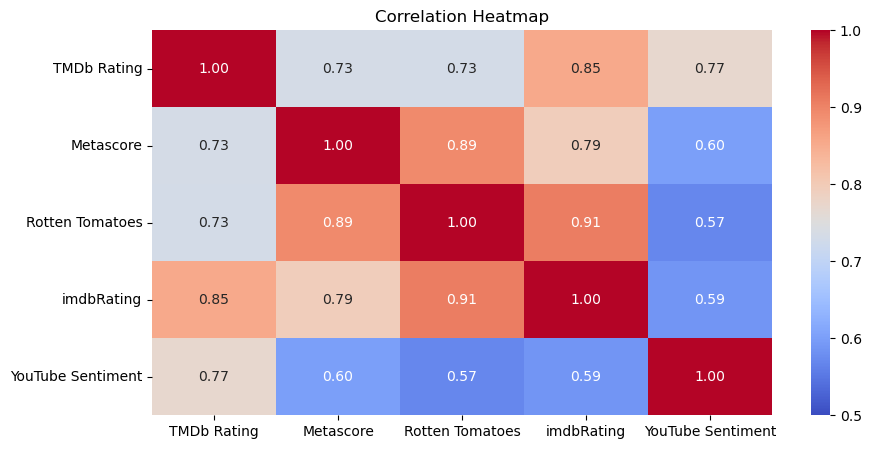

In [17]:
# Visualizing the correlation matrix
plt.figure(figsize=(10, 5))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0.5, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
df_pvalues = df_merged[['TMDb Rating', 'Metascore', 'Rotten Tomatoes', 'imdbRating', 'YouTube Sentiment']]

# Calculate Spearman correlation coefficients and p-values
correlations = []
p_values = []

for column1 in df_pvalues.columns:
    for column2 in df_pvalues.columns:
        if column1 != column2:
            correlation, p_value = spearmanr(df_pvalues[column1], df_pvalues[column2])
            correlations.append([f'{column1} vs {column2}', correlation, p_value])

# Create a Pandas DataFrame for the table
table_df = pd.DataFrame(correlations, columns=['Rating Pair', 'Correlation Coefficient', 'P-Value'])

# Define a function to add asterisks
def add_asterisks(p_value, alpha=0.05):
    if p_value < 0.001:
        return f'{p_value:.4f}***'
    elif p_value < 0.01:
        return f'{p_value:.4f}**'
    elif p_value < alpha:
        return f'{p_value:.4f}*'
    else:
        return f'{p_value:.4f}'

# Add asterisks to the P-values column
table_df['P-Value'] = table_df['P-Value'].apply(add_asterisks)

# Display the table
table = tabulate(table_df, headers='keys', tablefmt='fancy_grid')

print(table)

╒════╤══════════════════════════════════════╤═══════════════════════════╤═══════════╕
│    │ Rating Pair                          │   Correlation Coefficient │ P-Value   │
╞════╪══════════════════════════════════════╪═══════════════════════════╪═══════════╡
│  0 │ TMDb Rating vs Metascore             │                  0.733333 │ 0.0158*   │
├────┼──────────────────────────────────────┼───────────────────────────┼───────────┤
│  1 │ TMDb Rating vs Rotten Tomatoes       │                  0.731607 │ 0.0162*   │
├────┼──────────────────────────────────────┼───────────────────────────┼───────────┤
│  2 │ TMDb Rating vs imdbRating            │                  0.854545 │ 0.0016**  │
├────┼──────────────────────────────────────┼───────────────────────────┼───────────┤
│  3 │ TMDb Rating vs YouTube Sentiment     │                  0.769697 │ 0.0092**  │
├────┼──────────────────────────────────────┼───────────────────────────┼───────────┤
│  4 │ Metascore vs TMDb Rating             │         